## Analise Exploratória 

#### José Aldanildo | data science student

##### dados: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax
- rent amount (RS) : Valor do Aluguel (/) Rent amount
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

In [13]:
# Importando a Biblioteca a ser usada nessa analise
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregando o dataset e printando as 5 primeiras linhas
data = pd.read_csv('houses_to_rent_v2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
# verificando se tem dados faltantes no dataset
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [5]:
# verificando os tipos de variaveis de cada coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


### Problema: Explorar o valor do aluguel (rent amount RS)
#### Estatistica univariada

In [7]:
# renomiando a coluna rent amount
data.rename(columns = {'rent amount (R$)':'valor_aluguel'},inplace = True)

In [8]:
# Pegando o valor da média dos alugueis
data['valor_aluguel'].mean()

3896.247194163861

In [9]:
# Pegando a mediana 
data['valor_aluguel'].median()

2661.0

In [10]:
# Desvio padrão do valor dos alugueis
data['valor_aluguel'].std()

3408.5455176710816

In [11]:
# analise estatisca basica sobre o valor dos alugueis
data['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

<AxesSubplot:xlabel='valor_aluguel', ylabel='Count'>

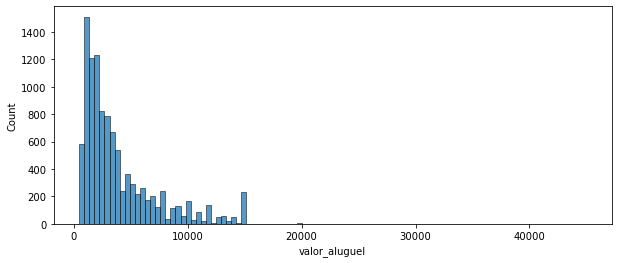

In [19]:
# Plotando um histplot
plt.figure(figsize =(10,4))
sns.histplot(x = 'valor_aluguel',data = data,bins = 100)

### Explorando Multivariáveis
#### Perguntas:
- Qual a cidade com a média de alugule mais cara?
- Quantos banheiros existem nas residencias com alugueis mais altos?
- Os imoveis mais caros aceitam animais?
- Os imoveis mais caros são mobiliados?

In [23]:
# Qual a cidade com a média de aluguel mais cara?
cidades_mais_caras = data.groupby('city')['valor_aluguel'].median().reset_index().sort_values('valor_aluguel',ascending = False)
cidades_mais_caras

,city,valor_aluguel
4,São Paulo,3400.0
0,Belo Horizonte,2300.0
3,Rio de Janeiro,2300.0
2,Porto Alegre,1650.0
1,Campinas,1500.0


In [24]:
# Quantos banheiros existem nas residencias com alugueis mais altos?
## por definição os alugueis mais altos acima de R$ 5.000,00

data['aluguel_alto'] = ['alto' if x >= 5000 else 'Baixo' for x in data['valor_aluguel']]

<AxesSubplot:xlabel='aluguel_alto', ylabel='count'>

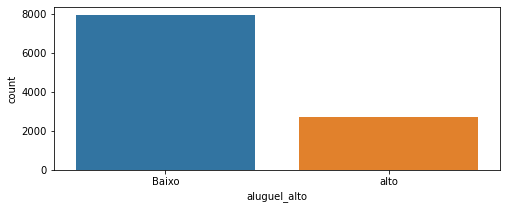

In [30]:
# verificando a coluna criada
plt.figure(figsize = (8,3))
sns.countplot(x= 'aluguel_alto', data = data)

In [31]:
# Valores exatos 
data['aluguel_alto'].value_counts()

Baixo    7975
alto     2717
Name: aluguel_alto, dtype: int64

In [32]:
data.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Baixo    1.743699
alto     3.684211
Name: bathroom, dtype: float64

<AxesSubplot:xlabel='animal', ylabel='count'>

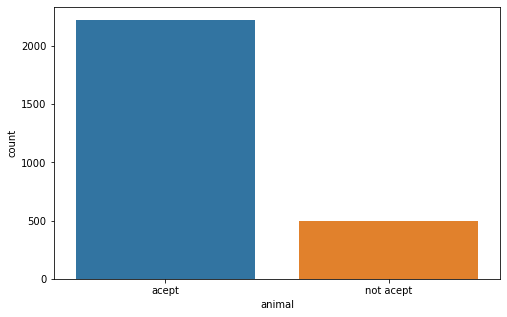

In [59]:
# Os imoveis mais caros aceitam animais
aluguel_alto = data[data['aluguel_alto'] == 'alto']
plt.figure(figsize = (8,5))
sns.countplot(x = 'animal',data = aluguel_alto)

In [52]:
aluguel_alto['animal'].value_counts()

acept        2223
not acept     494
Name: animal, dtype: int64

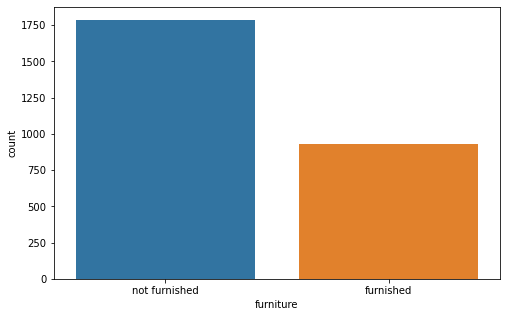

In [68]:
# Os imoveis mais caros são mobiliados
plt.figure(figsize = (8,5))
sns.countplot(x = 'furniture',data = aluguel_alto);

### Hipóteses
- São Paulo é a cidade com aluguel mais caro.
- Quanto mais banheiro em um imovel maior o valor do aluguel.
- Os imoveis com mobilia tem o aluguel mais alto.

In [41]:
# Vamos ver a correlação banheiro valor aluguel
plt.figure(figsize = (12,8))
data[['valor_aluguel','bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


<Figure size 864x576 with 0 Axes>

#### Para essa análise utilizamos as bibliotecas

- Pandas
- Seaborn
- Matplotlib

#### FIM